# Lab 1 Analysis Example using Thicket

In [175]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [176]:
tk = th.Thicket.from_caliperreader(glob("cali_files/sort0/*.cali"))
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Total time"], axis=1)
#tk.dataframe = tk.dataframe.drop(["spot.channel", "Total time"], axis=1)

In [177]:
# Performance data
tk.dataframe

Min time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              27870472         9.851475   
                                                  47336685         0.771172   
                                                  47349995        33.607990   
                                                  48844705        35.151441   
                                                  112973988        2.486051   
                                                  133440747       25.665017   
                                                  147533088       33.615235   
                                                  153181124        1.471097   
                                                  162177994        1.651498   
                                                  199746946        0.886345   
                                                  246214965       17.359519   
                                                  264455869        3.868689   
                                                  331780099       10.316530   
                                                  340786940        0.814511   
                                                  341218275       18.503863   
                                                  342176260        2.564809   
                                                  352749751        2.503674   
                                                  353694380       37.521588   
                                                  361584300        5.590988   
                                                  409130334        0.607422   
                                                  455670205        0.607166   
                                                  478380754        2.430481   
                                                  500480455        5.258444   
                                                  520770882        0.155172   
                                                  521436951        0.495869   
                                                  528520268        0.070389   
                                                  543825812        1.440629   
                                                  544925369        0.893507   
                                                  548212958        1.928146   
                                                  610086156        1.828237   
                                                  610176732        0.554140   
                                                  630029934      244.708830   
                                                  653311157        0.013567   
                                                  681821339        0.802393   
                                                  707336834        0.076999   
                                                  711667792        1.865128   
                                                  824490133        2.643489   
                                                  862429449        0.365657   
                                                  881410611        0.055659   
                                                  891846577        0.056925   
                                                  916639650        1.107286   
                                                  916864386        2.769755   
                                                  942006610       16.866352   
                                                  957597401        3.586996   
                                                  964496916        3.576238   
                                                  966775440        0.508345   
                                                  1015993060      18.311694   
                                                  1026471878     228.085844   
                                                  1071965932       7.009381   
                                 

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [178]:
tk.statsframe.dataframe["time"]= 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  ├─ 1.000 comm_large
│  │  ├─ 1.000 MPI_Recv
│  │  ├─ 1.000 MPI_Scatter
│  │  ├─ 1.000 MPI_Send
│  │  └─ 1.000 cudaMemcpy
│  └─ 1.000 comm_small
│     ├─ 1.000 MPI_Bcast
│     ├─ 1.000 MPI_Gather
│     ├─ 1.000 MPI_Recv
│     └─ 1.000 MPI_Send
├─ 1.000 comp
│  ├─ 1.000 comp_large
│  └─ 1.000 comp_small
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [161]:
tk.metadata

cali.caliper.version  mpi.world.size  \
profile                                           
54373920             2.11.0-dev             128   
59584598             2.11.0-dev               8   
67065037             2.11.0-dev              64   
105911008            2.11.0-dev             256   
135738047            2.11.0-dev             128   
141829259            2.11.0-dev             256   
184380683            2.11.0-dev             128   
290198302            2.11.0-dev               2   
293257743            2.11.0-dev               8   
307428700            2.11.0-dev              16   
308981384            2.11.0-dev              64   
339297524            2.11.0-dev               4   
344932907            2.11.0-dev             256   
369740385            2.11.0-dev            1024   
402874423            2.11.0-dev              64   
417354211            2.11.0-dev             512   
419742891            2.11.0-dev             256   
444224139            2.11.0-dev             128   
493166910            2.11.0-dev             512   
552015685            2.11.0-dev              64   
615901015            2.11.0-dev             512   
651939200            2.11.0-dev              32   
711450200            2.11.0-dev               8   
817426762            2.11.0-dev             512   
822016541            2.11.0-dev             256   
827507331            2.11.0-dev               4   
848298986            2.11.0-dev               2   
865756312            2.11.0-dev               2   
869136206            2.11.0-dev               4   
981414781            2.11.0-dev               2   
1022574103           2.11.0-dev             512   
1088482557           2.11.0-dev              64   
1107415064           2.11.0-dev             128   
1113569659           2.11.0-dev             128   
1170749765           2.11.0-dev               4   
1183841883           2.11.0-dev              16   
1186726216           2.11.0-dev             256   
1206395575           2.11.0-dev             128   
1262262462           2.11.0-dev            1024   
1289872809           2.11.0-dev             128   
1353737300           2.11.0-dev               8   
1359283220           2.11.0-dev              16   
1375030612           2.11.0-dev              64   
1433556316           2.11.0-dev             128   
1490412494           2.11.0-dev               8   
1500983933           2.11.0-dev               2   
1529967595           2.11.0-dev             128   
1603403782           2.11.0-dev               4   
1609840232           2.11.0-dev               4   
1655342701           2.11.0-dev            1024   
1658072546           2.11.0-dev               2   
1667136259           2.11.0-dev             512   
1697460450           2.11.0-dev             512   
1699345197           2.11.0-dev              16   
1715168256           2.11.0-dev               8   
1718715922           2.11.0-dev               8   
1747359441           2.11.0-dev             256   
1749744140           2.11.0-dev               4   
1763738823           2.11.0-dev              32   
1764925281           2.11.0-dev              64   
1771578168           2.11.0-dev            1024   
1794924161           2.11.0-dev             512   
1797999638           2.11.0-dev               4   
1815566252           2.11.0-dev            1024   
1828427390           2.11.0-dev              32   
1830071472           2.11.0-dev            1024   
1834396359           2.11.0-dev             128   
1834472826           2.11.0-dev             256   
1852707344           2.11.0-dev               8   
1891539591           2.11.0-dev            1024   
1910702503           2.11.0-dev             256   
1921182615           2.11.0-dev              32   
1935808403           2.11.0-dev               8   
1952795309           2.11.0-dev             256   
1975866046           2.11.0-dev             512   
1978940941           2.11.0-dev            1024   
1987721265           2.11.0-dev  

In [162]:
gb = tk.groupby("num_procs")
print(gb.keys())
allthickets = list(gb.values())
input2 = gb[2].groupby("Algorithm")
input4 = gb[4].groupby("Algorithm")
input8 = gb[8].groupby("Algorithm")
input16 = gb[16].groupby("Algorithm")
input32 = gb[32].groupby("Algorithm")
input64 = gb[64].groupby("Algorithm")
input128 = gb[128].groupby("Algorithm")
input256 = gb[256].groupby("Algorithm")
input512 = gb[512].groupby("Algorithm")
input1024 = gb[1024].groupby("Algorithm")


10  thickets created...
{2: <thicket.thicket.Thicket object at 0x2b083f167d60>, 4: <thicket.thicket.Thicket object at 0x2b083f969160>, 8: <thicket.thicket.Thicket object at 0x2b083f8cc760>, 16: <thicket.thicket.Thicket object at 0x2b083e7132e0>, 32: <thicket.thicket.Thicket object at 0x2b083d959040>, 64: <thicket.thicket.Thicket object at 0x2b083de371f0>, 128: <thicket.thicket.Thicket object at 0x2b083d806970>, 256: <thicket.thicket.Thicket object at 0x2b083d088070>, 512: <thicket.thicket.Thicket object at 0x2b083f146dc0>, 1024: <thicket.thicket.Thicket object at 0x2b083de0a070>}
dict_keys([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024])
3  thickets created...
{'Bubble Sort(Odd/Even)': <thicket.thicket.Thicket object at 0x2b083f9e5190>, 'MergeSort': <thicket.thicket.Thicket object at 0x2b083f9e57c0>, 'Sample Sort': <thicket.thicket.Thicket object at 0x2b083f2c5b50>}
3  thickets created...
{'Bubble Sort(Odd/Even)': <thicket.thicket.Thicket object at 0x2b083f1ae310>, 'MergeSort': <thicket.thi

Compose these 3 groups column-wise to get a holistic view of the data

In [163]:
ctk2 = th.Thicket.concat_thickets(
    thickets=list(input2.values()),
    headers=list(input2.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk4 = th.Thicket.concat_thickets(
    thickets=list(input4.values()),
    headers=list(input4.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk8 = th.Thicket.concat_thickets(
    thickets=list(input8.values()),
    headers=list(input8.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk16 = th.Thicket.concat_thickets(
    thickets=list(input16.values()),
    headers=list(input16.keys()),
    axis="columns",
    metadata_key="InputSize"
)
ctk32 = th.Thicket.concat_thickets(
    thickets=list(input32.values()),
    headers=list(input32.keys()),
    axis="columns",
    metadata_key="InputSize"
)
ctk64 = th.Thicket.concat_thickets(
    thickets=list(input64.values()),
    headers=list(input64.keys()),
    axis="columns",
    metadata_key="InputSize"
)
ctk128 = th.Thicket.concat_thickets(
    thickets=list(input128.values()),
    headers=list(input128.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk256 = th.Thicket.concat_thickets(
    thickets=list(input256.values()),
    headers=list(input256.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk512 = th.Thicket.concat_thickets(
    thickets=list(input512.values()),
    headers=list(input512.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk1024 = th.Thicket.concat_thickets(
    thickets=list(input1024.values()),
    headers=list(input1024.keys()),
    axis="columns",
    metadata_key="InputSize"
)



allctk = []
allctk.append(ctk2)
allctk.append(ctk4)
allctk.append(ctk8)
allctk.append(ctk16)
allctk.append(ctk32)
allctk.append(ctk64)
allctk.append(ctk128)
allctk.append(ctk256)
allctk.append(ctk512)
allctk.append(ctk1024)

In [164]:
for ctk in allctk:
    display(ctk.dataframe)

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                 18.263462   
                                                  262144               292.539192   
                                                  1048576             4720.204189   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm', 'type': 'function'}              65536                  0.000493   
                                                  262144                 0.000939   
                                                  1048576                9.736454   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_small', 'type': 'function'}        65536                  0.000466   
                                                  262144                 0.000913   
                                                  1048576        

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                 13.695894   
                                                  262144               219.289887   
                                                  1048576             3532.919358   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm', 'type': 'function'}              65536                  3.044797   
                                                  262144                48.746191   
                                                  1048576              786.017415   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_small', 'type': 'function'}        65536                  3.044762   
                                                  262144                48.746147   
                                                  1048576        

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                 12.969012   
                                                  262144               207.028604   
                                                  1048576             3328.373696   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm', 'type': 'function'}              65536                  4.600372   
                                                  262144                73.062213   
                                                  1048576             1173.932206   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_small', 'type': 'function'}        65536                  4.600304   
                                                  262144                73.062131   
                                                  1048576        

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                  3.147513   
                                                  262144                50.203138   
                                                  1048576             3224.808611   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm', 'type': 'function'}              65536                  1.345260   
                                                  262144                21.319573   
                                                  1048576             1365.405034   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_small', 'type': 'function'}        65536                  1.345131   
                                                  262144                21.319437   
                                                  1048576        

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                  1.559119   
                                                  262144                24.751998   
                                                  1048576             3183.077732   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm', 'type': 'function'}              65536                  0.752068   
                                                  262144                11.456582   
                                                  1048576             1470.186787   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_small', 'type': 'function'}        65536                  0.751824   
                                                  262144                11.456315   
                                                  1048576        

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                  1.925207   
                                                  262144                24.780990   
                                                  1048576             3154.001643   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm', 'type': 'function'}              65536                  1.030482   
                                                  262144                12.288043   
                                                  1048576             1516.946029   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_small', 'type': 'function'}        65536                  1.029740   
                                                  262144                12.287538   
                                                  1048576        

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                  2.667785   
                                                  262144                25.048625   
                                                  1048576              785.812521   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  167772216                   NaN   
                                                  268435456                   NaN   
{'name': 'comm', 'type': 'function'}              65536                  1.882442   
                                                  262144                12.916232   
                                                  1048576              387.578344   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  167772216                   NaN   
                                                  268435456                   NaN   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  167772216                   NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  167772216                   NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  167772216                   NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216       

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                  5.122451   
                                                  262144                27.714348   
                                                  1048576              778.160553   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm', 'type': 'function'}              65536                  4.794907   
                                                  262144                16.424497   
                                                  1048576              388.439125   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_small', 'type': 'function'}        65536                  4.791950   
                                                  262144                16.421331   
                                                  1048576        

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                  1.425560   
                                                  262144                14.154368   
                                                  1048576              382.772719   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm', 'type': 'function'}              65536                  1.334167   
                                                  262144                11.013453   
                                                  1048576              193.810731   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_small', 'type': 'function'}        65536                  1.328358   
                                                  262144                10.730563   
                                                  1048576        

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                  3.319663   
                                                  262144                15.644663   
                                                  1048576              361.294187   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm', 'type': 'function'}              65536                  3.251050   
                                                  262144                14.504645   
                                                  1048576              188.941574   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_small', 'type': 'function'}        65536                  3.239555   
                                                  262144                14.466400   
                                                  1048576        

Perform pandas operations to get the table in a desirable format for plotting

In [165]:
for ctk in allctk:
    # Drop unwanted columns
    columns_to_drop = [("node", ""), ("index", ""),]
    ctk.dataframe = ctk.dataframe.reset_index().drop(columns_to_drop, axis=1, errors='ignore')
    # Rename index to remove tuple
    ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])

In [166]:
for ctk in allctk:
    display(ctk.dataframe)

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                 18.263462     18.263468     18.263465   
                  262144               292.539192    292.539209    292.539201   
                  1048576             4720.204189   4720.204764   4720.204477   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm              65536                  0.000493     12.174188      6.087340   
                  262144                 0.000939    195.126292     97.563616   
                  1048576                9.736454   3144.909090   1577.322772   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_small        65536                  0.000466     12.174173      6.087319   
                  262144                 0.000913    195.126272     97.563593   
                  1048576                9.736422   3144.909070   1577.322746   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                 13.695894     13.701026     13.699614   
                  262144               219.289887    219.290008    219.289928   
                  1048576             3532.919358   3532.923020   3532.920429   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm              65536                  3.044797      9.130398      6.089711   
                  262144                48.746191    146.156628     97.464887   
                  1048576              786.017415   2355.182635   1570.841162   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_small        65536                  3.044762      9.130377      6.089669   
                  262144                48.746147    146.156597     97.464838   
                  1048576              786.017369   2355.182605   1570.841109   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                 12.969012     13.023235     12.997421   
                  262144               207.028604    207.116998    207.072843   
                  1048576             3328.373696   3328.394104   3328.385911   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm              65536                  4.600372     10.707082      6.531219   
                  262144                73.062213    170.495220    103.544230   
                  1048576             1173.932206   2740.448545   1664.303928   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_small        65536                  4.600304     10.707043      6.531127   
                  262144                73.062131    170.495177    103.544126   
                  1048576             1173.932120   2740.448498   1664.303810   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                  3.147513      3.156777      3.152067   
                  262144                50.203138     50.247135     50.230951   
                  1048576             3224.808611   3226.637209   3225.956912   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm              65536                  1.345260      2.864020      1.607753   
                  262144                21.319573     45.632920     25.515901   
                  1048576             1365.405034   2932.011296   1638.678689   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_small        65536                  1.345131      2.863956      1.607574   
                  262144                21.319437     45.632846     25.515717   
                  1048576             1365.404888   2932.011207   1638.677841   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                  1.559119      1.591144      1.578158   
                  262144                24.751998     24.776577     24.767377   
                  1048576             3183.077732   3185.158674   3184.266402   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm              65536                  0.752068      1.486079      0.811701   
                  262144                11.456582     23.617842     12.554518   
                  1048576             1470.186787   3036.965321   1611.872617   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_small        65536                  0.751824      1.485954      0.811342   
                  262144                11.456315     23.617710     12.554147   
                  1048576             1470.186490   3036.965172   1611.871199   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                  1.925207      1.991135      1.958684   
                  262144                24.780990     24.953494     24.877476   
                  1048576             3154.001643   3154.818271   3154.243600   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm              65536                  1.030482      1.907353      1.233760   
                  262144                12.288043     24.216426     12.790828   
                  1048576             1516.946029   3080.570930   1589.118378   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_small        65536                  1.029740      1.907100      1.231730   
                  262144                12.287538     24.216160     12.786782   
                  1048576             1516.895080   3080.568991   1589.115189   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                  2.667785      2.874410      2.781956   
                  262144                25.048625     25.204584     25.125642   
                  1048576              785.812521    786.825030    786.267831   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  167772216                   NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm              65536                  1.882442      2.717886      2.278223   
                  262144                12.916232     24.768626     13.345601   
                  1048576              387.578344    777.179076    396.591564   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  167772216                   NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  167772216                   NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  167772216                   NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  167772216                   NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  167772216                   NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                  5.122451      5.510197      5.302077   
                  262144                27.714348     28.216746     28.005094   
                  1048576              778.160553    779.829514    779.206349   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm              65536                  4.794907      5.406316      5.156508   
                  262144                16.424497     27.754468     17.029026   
                  1048576              388.439125    773.722331    394.052258   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_small        65536                  4.791950      5.403455      5.153538   
                  262144                16.421331     27.753471     16.955993   
                  1048576              388.402300    773.721271    394.036581   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                  1.425560     38.605827     33.699853   
                  262144                14.154368     14.861778     14.540240   
                  1048576              382.772719    383.537731    383.064917   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm              65536                  1.334167     38.530742     33.617228   
                  262144                11.013453     14.255847     12.007729   
                  1048576              193.810731    382.263660    197.796200   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_small        65536                  1.328358     38.524259     33.609815   
                  262144                10.730563     14.253863     11.966741   
                  1048576              193.772747    382.261634    197.747896   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                  3.319663      4.573266      3.864749   
                  262144                15.644663     18.532168     16.647009   
                  1048576              361.294187    362.526118    361.800679   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm              65536                  3.251050      4.502178      3.790396   
                  262144                14.504645     17.427836     15.621275   
                  1048576              188.941574    361.367848    203.328885   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_small        65536                  3.239555      4.490614      3.775191   
                  262144                14.466400     17.385705     15.592295   
                  1048576              188.383442    361.363663    202.280403   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN          

In [167]:
# Drop unwanted columns
for ctk in allctk:
    columns_to_drop = [('Bubble Sort(Odd/Even)', 'Max time/rank'), ('Bubble Sort(Odd/Even)', 'Min time/rank'), ('Bubble Sort(Odd/Even)', 'Variance time/rank'), ('Sample Sort', 'Max time/rank'), ('Sample Sort', 'Min time/rank'), ('Sample Sort', 'Variance time/rank'), ('MergeSort', 'Variance time/rank'), ('MergeSort', 'Max time/rank'), ('MergeSort', 'Min time/rank'),]
    ctk.dataframe = ctk.dataframe.drop(columns_to_drop, axis=1, errors='ignore')
    #function_names = sorted(ctk.dataframe.columns.tolist())



In [168]:
for ctk in allctk:
    display(ctk.metadata)

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev            2.0   
262144               2.11.0-dev            2.0   
1048576              2.11.0-dev            2.0   
4194304                     NaN            NaN   
16777216                    NaN            NaN   
67108864                    NaN            NaN   
268435456                   NaN            NaN   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304                                                  NaN   
16777216                                                 NaN   
67108864                                                 NaN   
268435456                                                NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                             2.0   
262144                                            2.0   
1048576                                           2.0   
4194304                       NaN                 NaN   
16777216                      NaN                 NaN   
67108864                      NaN                 NaN   
268435456                     NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304                         NaN            NaN          NaN   
16777216                        NaN            NaN          NaN   
67108864                        NaN            NaN          NaN   
268435456                       NaN            NaN          NaN   

                                                                       \
          spot:node.order              spot:output spot:time.variance   
InputSize                                                               
65536                true    65536-2-1-bubble.cali               true   
262144               true   262144-2-1-bubble.cali               true   
1048576              true  1048576-2-1-bubble.cali               true   
4194304               NaN                      NaN                NaN   
16777216              NaN                      NaN                NaN   
67108864              NaN                      NaN                NaN   
268435456             NaN                      NaN                NaN   

                                                                            \
             launchdate                                          libraries   
InputSize                                                                    
65536      1.700071e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1.700071e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1.700072e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304             NaN                                                NaN   
16777216            NaN                                                NaN   
67108864            NaN                                                NaN   
268435456           NaN                                                NaN   

                                                                       \
                               cmdline cl

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev            4.0   
262144               2.11.0-dev            4.0   
1048576              2.11.0-dev            4.0   
4194304                     NaN            NaN   
16777216                    NaN            NaN   
67108864                    NaN            NaN   
268435456                   NaN            NaN   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304                                                  NaN   
16777216                                                 NaN   
67108864                                                 NaN   
268435456                                                NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                             2.0   
262144                                            2.0   
1048576                                           2.0   
4194304                       NaN                 NaN   
16777216                      NaN                 NaN   
67108864                      NaN                 NaN   
268435456                     NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304                         NaN            NaN          NaN   
16777216                        NaN            NaN          NaN   
67108864                        NaN            NaN          NaN   
268435456                       NaN            NaN          NaN   

                                                                       \
          spot:node.order              spot:output spot:time.variance   
InputSize                                                               
65536                true    65536-4-1-bubble.cali               true   
262144               true   262144-4-1-bubble.cali               true   
1048576              true  1048576-4-1-bubble.cali               true   
4194304               NaN                      NaN                NaN   
16777216              NaN                      NaN                NaN   
67108864              NaN                      NaN                NaN   
268435456             NaN                      NaN                NaN   

                                                                            \
             launchdate                                          libraries   
InputSize                                                                    
65536      1.700071e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1.700071e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1.700072e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304             NaN                                                NaN   
16777216            NaN                                                NaN   
67108864            NaN                                                NaN   
268435456           NaN                                                NaN   

                                                                       \
                               cmdline cl

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev            8.0   
262144               2.11.0-dev            8.0   
1048576              2.11.0-dev            8.0   
4194304                     NaN            NaN   
16777216                    NaN            NaN   
67108864                    NaN            NaN   
268435456                   NaN            NaN   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304                                                  NaN   
16777216                                                 NaN   
67108864                                                 NaN   
268435456                                                NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                             2.0   
262144                                            2.0   
1048576                                           2.0   
4194304                       NaN                 NaN   
16777216                      NaN                 NaN   
67108864                      NaN                 NaN   
268435456                     NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304                         NaN            NaN          NaN   
16777216                        NaN            NaN          NaN   
67108864                        NaN            NaN          NaN   
268435456                       NaN            NaN          NaN   

                                                                       \
          spot:node.order              spot:output spot:time.variance   
InputSize                                                               
65536                true    65536-8-1-bubble.cali               true   
262144               true   262144-8-1-bubble.cali               true   
1048576              true  1048576-8-1-bubble.cali               true   
4194304               NaN                      NaN                NaN   
16777216              NaN                      NaN                NaN   
67108864              NaN                      NaN                NaN   
268435456             NaN                      NaN                NaN   

                                                                            \
             launchdate                                          libraries   
InputSize                                                                    
65536      1.700071e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1.700071e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1.700072e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304             NaN                                                NaN   
16777216            NaN                                                NaN   
67108864            NaN                                                NaN   
268435456           NaN                                                NaN   

                                                                       \
                               cmdline cl

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev           16.0   
262144               2.11.0-dev           16.0   
1048576              2.11.0-dev           16.0   
4194304                     NaN            NaN   
16777216                    NaN            NaN   
67108864                    NaN            NaN   
268435456                   NaN            NaN   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304                                                  NaN   
16777216                                                 NaN   
67108864                                                 NaN   
268435456                                                NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                             2.0   
262144                                            2.0   
1048576                                           2.0   
4194304                       NaN                 NaN   
16777216                      NaN                 NaN   
67108864                      NaN                 NaN   
268435456                     NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304                         NaN            NaN          NaN   
16777216                        NaN            NaN          NaN   
67108864                        NaN            NaN          NaN   
268435456                       NaN            NaN          NaN   

                                                                        \
          spot:node.order               spot:output spot:time.variance   
InputSize                                                                
65536                true    65536-16-1-bubble.cali               true   
262144               true   262144-16-1-bubble.cali               true   
1048576              true  1048576-16-1-bubble.cali               true   
4194304               NaN                       NaN                NaN   
16777216              NaN                       NaN                NaN   
67108864              NaN                       NaN                NaN   
268435456             NaN                       NaN                NaN   

                                                                            \
             launchdate                                          libraries   
InputSize                                                                    
65536      1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1.700075e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304             NaN                                                NaN   
16777216            NaN                                                NaN   
67108864            NaN                                                NaN   
268435456           NaN                                                NaN   

                                                                       \
                               

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev           32.0   
262144               2.11.0-dev           32.0   
1048576              2.11.0-dev           32.0   
4194304                     NaN            NaN   
16777216                    NaN            NaN   
67108864                    NaN            NaN   
268435456                   NaN            NaN   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304                                                  NaN   
16777216                                                 NaN   
67108864                                                 NaN   
268435456                                                NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                             2.0   
262144                                            2.0   
1048576                                           2.0   
4194304                       NaN                 NaN   
16777216                      NaN                 NaN   
67108864                      NaN                 NaN   
268435456                     NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304                         NaN            NaN          NaN   
16777216                        NaN            NaN          NaN   
67108864                        NaN            NaN          NaN   
268435456                       NaN            NaN          NaN   

                                                                        \
          spot:node.order               spot:output spot:time.variance   
InputSize                                                                
65536                true    65536-32-1-bubble.cali               true   
262144               true   262144-32-1-bubble.cali               true   
1048576              true  1048576-32-1-bubble.cali               true   
4194304               NaN                       NaN                NaN   
16777216              NaN                       NaN                NaN   
67108864              NaN                       NaN                NaN   
268435456             NaN                       NaN                NaN   

                                                                            \
             launchdate                                          libraries   
InputSize                                                                    
65536      1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1.700075e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304             NaN                                                NaN   
16777216            NaN                                                NaN   
67108864            NaN                                                NaN   
268435456           NaN                                                NaN   

                                                                       \
                               

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev           64.0   
262144               2.11.0-dev           64.0   
1048576              2.11.0-dev           64.0   
4194304                     NaN            NaN   
16777216                    NaN            NaN   
67108864                    NaN            NaN   
268435456                   NaN            NaN   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304                                                  NaN   
16777216                                                 NaN   
67108864                                                 NaN   
268435456                                                NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                             2.0   
262144                                            2.0   
1048576                                           2.0   
4194304                       NaN                 NaN   
16777216                      NaN                 NaN   
67108864                      NaN                 NaN   
268435456                     NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304                         NaN            NaN          NaN   
16777216                        NaN            NaN          NaN   
67108864                        NaN            NaN          NaN   
268435456                       NaN            NaN          NaN   

                                                                        \
          spot:node.order               spot:output spot:time.variance   
InputSize                                                                
65536                true    65536-64-1-bubble.cali               true   
262144               true   262144-64-1-bubble.cali               true   
1048576              true  1048576-64-1-bubble.cali               true   
4194304               NaN                       NaN                NaN   
16777216              NaN                       NaN                NaN   
67108864              NaN                       NaN                NaN   
268435456             NaN                       NaN                NaN   

                                                                            \
             launchdate                                          libraries   
InputSize                                                                    
65536      1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1.700075e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304             NaN                                                NaN   
16777216            NaN                                                NaN   
67108864            NaN                                                NaN   
268435456           NaN                                                NaN   

                                                                       \
                               

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev          128.0   
262144               2.11.0-dev          128.0   
1048576              2.11.0-dev          128.0   
4194304                     NaN            NaN   
16777216                    NaN            NaN   
67108864                    NaN            NaN   
268435456                   NaN            NaN   
167772216                   NaN            NaN   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304                                                  NaN   
16777216                                                 NaN   
67108864                                                 NaN   
268435456                                                NaN   
167772216                                                NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                             2.0   
262144                                            2.0   
1048576                                           2.0   
4194304                       NaN                 NaN   
16777216                      NaN                 NaN   
67108864                      NaN                 NaN   
268435456                     NaN                 NaN   
167772216                     NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304                         NaN            NaN          NaN   
16777216                        NaN            NaN          NaN   
67108864                        NaN            NaN          NaN   
268435456                       NaN            NaN          NaN   
167772216                       NaN            NaN          NaN   

                                                                         \
          spot:node.order                spot:output spot:time.variance   
InputSize                                                                 
65536                true    65536-128-1-bubble.cali               true   
262144               true   262144-128-1-bubble.cali               true   
1048576              true  1048576-128-1-bubble.cali               true   
4194304               NaN                        NaN                NaN   
16777216              NaN                        NaN                NaN   
67108864              NaN                        NaN                NaN   
268435456             NaN                        NaN                NaN   
167772216             NaN                        NaN                NaN   

                                                                            \
             launchdate                                          libraries   
InputSize                                                                    
65536      1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1.700076e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304             NaN                                                NaN   
16777216        

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev          256.0   
262144               2.11.0-dev          256.0   
1048576              2.11.0-dev          256.0   
4194304                     NaN            NaN   
16777216                    NaN            NaN   
67108864                    NaN            NaN   
268435456                   NaN            NaN   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304                                                  NaN   
16777216                                                 NaN   
67108864                                                 NaN   
268435456                                                NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                             2.0   
262144                                            2.0   
1048576                                           2.0   
4194304                       NaN                 NaN   
16777216                      NaN                 NaN   
67108864                      NaN                 NaN   
268435456                     NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304                         NaN            NaN          NaN   
16777216                        NaN            NaN          NaN   
67108864                        NaN            NaN          NaN   
268435456                       NaN            NaN          NaN   

                                                                         \
          spot:node.order                spot:output spot:time.variance   
InputSize                                                                 
65536                true    65536-256-1-bubble.cali               true   
262144               true   262144-256-1-bubble.cali               true   
1048576              true  1048576-256-1-bubble.cali               true   
4194304               NaN                        NaN                NaN   
16777216              NaN                        NaN                NaN   
67108864              NaN                        NaN                NaN   
268435456             NaN                        NaN                NaN   

                                                                            \
             launchdate                                          libraries   
InputSize                                                                    
65536      1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1.700076e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304             NaN                                                NaN   
16777216            NaN                                                NaN   
67108864            NaN                                                NaN   
268435456           NaN                                                NaN   

                                                                       \
                     

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev          512.0   
262144               2.11.0-dev          512.0   
1048576              2.11.0-dev          512.0   
4194304                     NaN            NaN   
16777216                    NaN            NaN   
67108864                    NaN            NaN   
268435456                   NaN            NaN   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304                                                  NaN   
16777216                                                 NaN   
67108864                                                 NaN   
268435456                                                NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                             2.0   
262144                                            2.0   
1048576                                           2.0   
4194304                       NaN                 NaN   
16777216                      NaN                 NaN   
67108864                      NaN                 NaN   
268435456                     NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304                         NaN            NaN          NaN   
16777216                        NaN            NaN          NaN   
67108864                        NaN            NaN          NaN   
268435456                       NaN            NaN          NaN   

                                                                         \
          spot:node.order                spot:output spot:time.variance   
InputSize                                                                 
65536                true    65536-512-1-bubble.cali               true   
262144               true   262144-512-1-bubble.cali               true   
1048576              true  1048576-512-1-bubble.cali               true   
4194304               NaN                        NaN                NaN   
16777216              NaN                        NaN                NaN   
67108864              NaN                        NaN                NaN   
268435456             NaN                        NaN                NaN   

                                                                            \
             launchdate                                          libraries   
InputSize                                                                    
65536      1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1.700079e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304             NaN                                                NaN   
16777216            NaN                                                NaN   
67108864            NaN                                                NaN   
268435456           NaN                                                NaN   

                                                                       \
                     

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev         1024.0   
262144               2.11.0-dev         1024.0   
1048576              2.11.0-dev         1024.0   
4194304                     NaN            NaN   
16777216                    NaN            NaN   
67108864                    NaN            NaN   
268435456                   NaN            NaN   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304                                                  NaN   
16777216                                                 NaN   
67108864                                                 NaN   
268435456                                                NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                             2.0   
262144                                            2.0   
1048576                                           2.0   
4194304                       NaN                 NaN   
16777216                      NaN                 NaN   
67108864                      NaN                 NaN   
268435456                     NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304                         NaN            NaN          NaN   
16777216                        NaN            NaN          NaN   
67108864                        NaN            NaN          NaN   
268435456                       NaN            NaN          NaN   

                                                                          \
          spot:node.order                 spot:output spot:time.variance   
InputSize                                                                  
65536                true    65536-1024-1-bubble.cali               true   
262144               true   262144-1024-1-bubble.cali               true   
1048576              true  1048576-1024-1-bubble.cali               true   
4194304               NaN                         NaN                NaN   
16777216              NaN                         NaN                NaN   
67108864              NaN                         NaN                NaN   
268435456             NaN                         NaN                NaN   

                                                                            \
             launchdate                                          libraries   
InputSize                                                                    
65536      1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1.700079e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1.700079e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304             NaN                                                NaN   
16777216            NaN                                                NaN   
67108864            NaN                                                NaN   
268435456           NaN                                                NaN   

                                                                       \
           

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [169]:
sizes = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435356]

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [170]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(df.columns)
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [171]:
def plot_mpl2(df,df1, df2, title, xlabel, ylabel, label1, label2, label3):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='<', label=label3)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(sizes)
    plt.show()
    return fig, ax

# Examples

## time

In [172]:
temp = [('Bubble Sort(Odd/Even)', 'Avg time/rank'), ('Sample Sort', 'Avg time/rank'), ('MergeSort', 'Avg time/rank')]

print(temp[0])
print(ctk.dataframe.columns)

('Bubble Sort(Odd/Even)', 'Avg time/rank')
MultiIndex([('Bubble Sort(Odd/Even)', 'Avg time/rank'),
            (            'MergeSort', 'Avg time/rank'),
            (          'Sample Sort', 'Avg time/rank')],
           )


In [173]:
threads =  [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

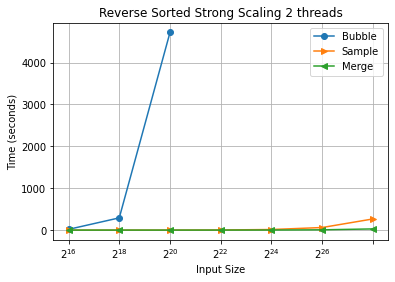

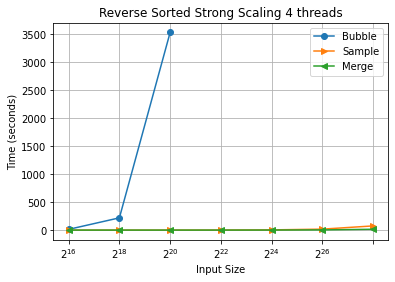

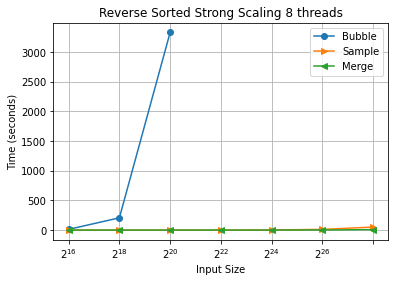

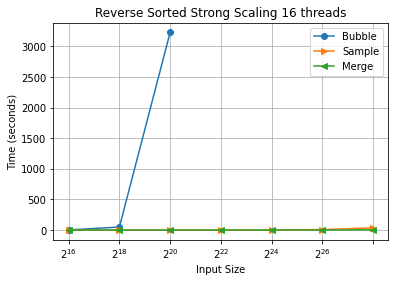

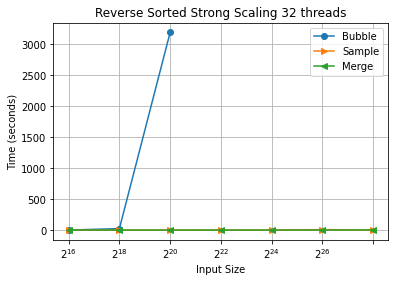

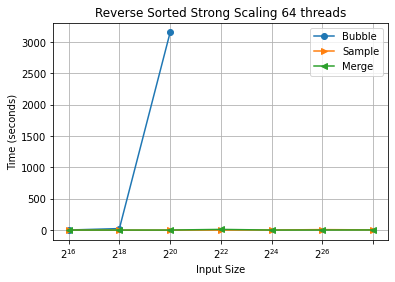

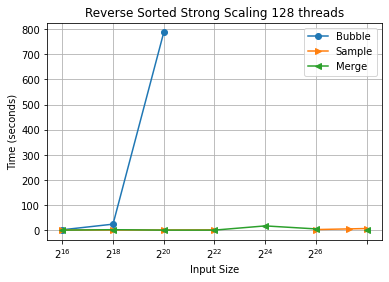

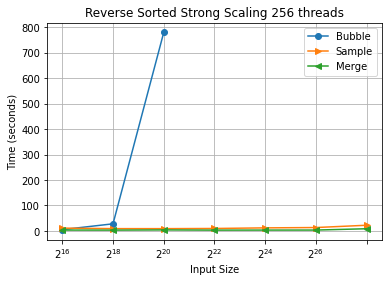

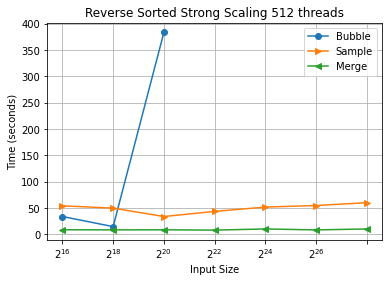

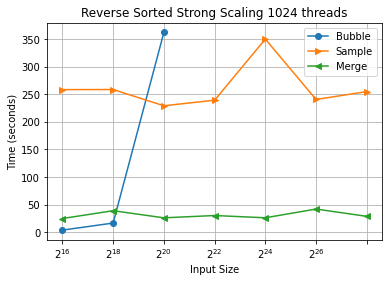

In [174]:
i = 0
for ctk in allctk:
    plot_mpl2(
        df=ctk.dataframe[[temp[0]]].loc["main"],
        df1= ctk.dataframe[[temp[1]]].loc["main"],
        df2= ctk.dataframe[[temp[2]]].loc["main"],
        title=f"Reverse Sorted Strong Scaling {threads[i]} threads",
        xlabel="Input Size",
        ylabel="Time (seconds)",
        label1='Bubble',
        label2='Sample',
        label3='Merge'
    )
    i += 1

## Speedup